# Visualizing the Superposition in Histogram

At first, let us explore and verify the fact that, Hadamard Gate indeed creates an equal superposition of quantum states.

In [7]:
!pip show qiskit-aer

Name: qiskit-aer
Version: 0.12.0
Summary: Qiskit Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: hello@qiskit.org
License: Apache 2.0
Location: C:\Users\CEDP\AppData\Roaming\Python\Python311\site-packages
Requires: numpy, qiskit-terra, scipy
Required-by: qiskit


In [1]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector

First, we build the simplest circuit containing only a single qubit and a single Hadamard Gate.

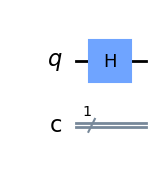

In [2]:
# Create a quantum circuit with one qubit and one classical bit for measurement
qc = QuantumCircuit(1,1)

# Apply Hadamard gate to the first qubit
qc.h(0)

qc.draw('mpl')

Now, to verify what we know, we must also measure the qubit.

So, we will introduce a measuring device as well. Here we need to understand, after the measurement happens, the superposition magically shrinks down to a single state. Therefore, qiskit introduces a classical register containing classical bits to store the results.

In the function measure, we provide two arguments, which qbit to measure and in which classical bit to store the result. Let's use the first classical bit c[0] for now.

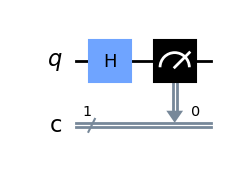

In [85]:
# Measure the qubits
qc.measure([0],[0])  # measure qubit[0] and store the result into classical_bit[0]

qc.draw('mpl')

Next comes the most exciting part of qiskit, we will be able to test our circuit right onto a real quantum hardware. Here we use 'qasm_simulator'.

In [86]:
# Choose the backend (simulator or real quantum device)
backend = Aer.get_backend('qasm_simulator')

# Transpile the quantum circuit for the chosen backend
transpiled_qc = transpile(qc, backend)

# Execute the quantum circuit on the chosen backend
result = execute(transpiled_qc, backend, shots=1000).result()

The results of the run are now stored in the result variable. Think about how we may visualize the result. One way is to observe, out of the 1000 shots of runs, how many have resulted in a 0 state, and how many in a 1 state? How should these numbers correlate? Near or Distant? Let's see.

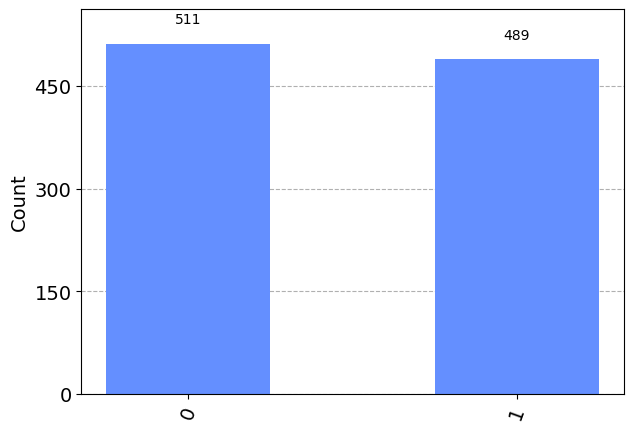

In [87]:
# Get the counts of the measurements
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)

As expected, the counts are almost equal, thereby confirming the 2D demonstration that resulted in a 50-50 superposition of both states.

Now let's generalize the code for any number of qubits.

In [88]:
n = 4
shots = 10000

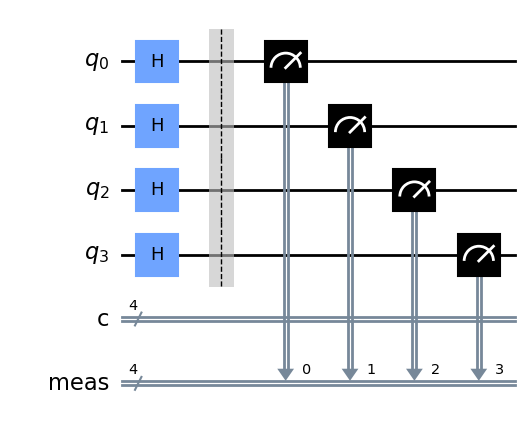

In [89]:
# Create a quantum circuit with n qubits
qc = QuantumCircuit(n,n)

# Apply Hadamard gate to all qubits
for i in range(n):
    qc.h(i)

# Measure the qubits
qc.measure_all()

qc.draw('mpl')

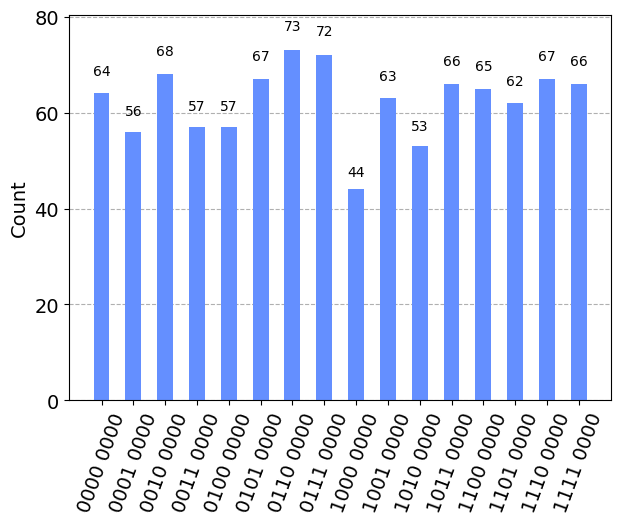

In [90]:
# Choose the backend (simulator or real quantum device)
backend = Aer.get_backend('qasm_simulator')

# Transpile the quantum circuit for the chosen backend
transpiled_qc = transpile(qc, backend)

# Execute the quantum circuit on the chosen backend
result = execute(transpiled_qc, backend, shots=1000).result()

# Get the counts of the measurements
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)

# Visualization in Bloch Sphere

Now let's visialize the outputs in statevector or Bloch Sphere. To compare the outputs with those you have observed in the 3D playground, please pay a visit to there again. Open that 3D simulation and place the input qubit along z-axis. Remember that when the vector is pointing in the z-direction it means the qubit $|0\rangle$. Now observe where the output qubit results in.

Great!

Now let's actually apply the Hadamard gate on a quantum hardware and see the result on a Bloch sphere.

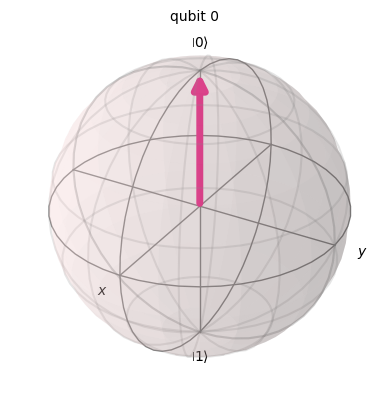

In [91]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Visualize the initial statevector on the Bloch sphere
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(transpile(qc, simulator)).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

# Here we see the input qubit initially at |0> state


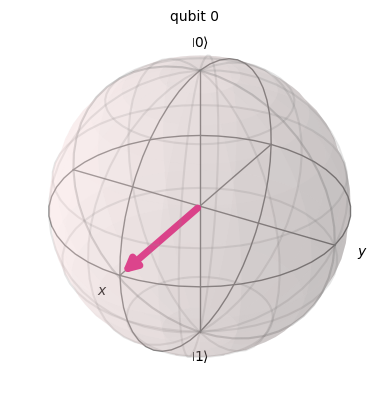

In [92]:
# Apply Hadamard gate
qc.h(0)

# Visualize the statevector after Hadamard gate on the Bloch sphere
result = simulator.run(transpile(qc, simulator)).result()
statevector_after_hadamard = result.get_statevector()
plot_bloch_multivector(statevector_after_hadamard)

# Hadamard is its self-inverse 

Now let's explore another interesting property of Hadamard gate that it is its own inverse. For this, let's build a very simple circuit with only one qubit. We just pass this through two consecutive Hadamard gates in a row. Let's see what happens.

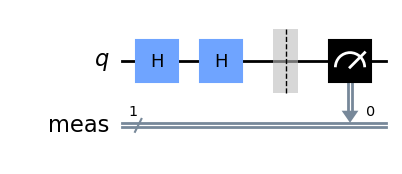

In [93]:
# Create a quantum circuit with a single qubit
qc = QuantumCircuit(1)

# Apply the Hadamard gate
qc.h(0)

# Apply the Hadamard gate again
qc.h(0)

# Measure the qubit
qc.measure_all()

qc.draw(output='mpl')


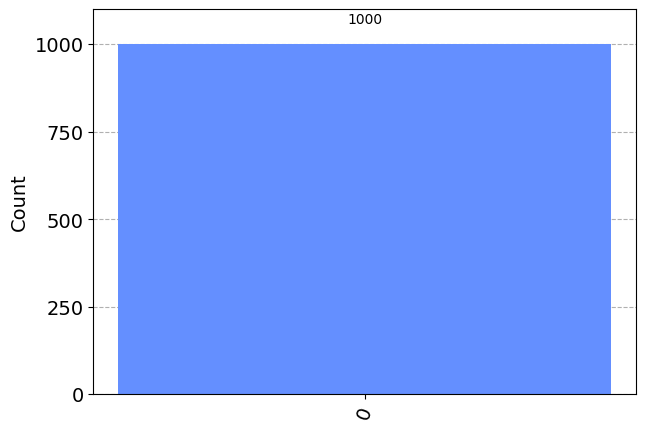

In [94]:
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)

# Execute the quantum circuit on the chosen backend
result = execute(transpiled_qc, backend, shots=1000).result()

# Get the counts of the measurements
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)

As expected, it returns the $|0\rangle$ just as it was. Now, just to be sure, let's add another hadamard gate and watch happens.

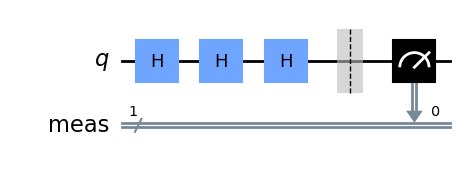

In [95]:
# Create a quantum circuit with a single qubit
qc = QuantumCircuit(1)

# Apply the Hadamard gate
qc.h(0)

# Apply the Hadamard gate again
qc.h(0)

# Apply the Hadamard gate again
qc.h(0)

# Measure the qubit
qc.measure_all()

qc.draw(output='mpl')

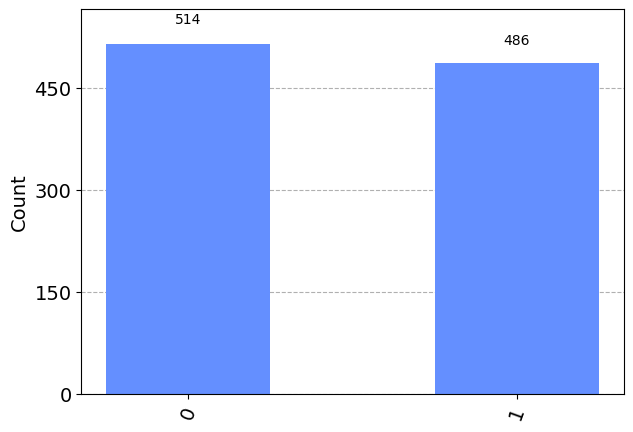

In [96]:
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)

# Execute the quantum circuit on the chosen backend
result = execute(transpiled_qc, backend, shots=1000).result()

# Get the counts of the measurements
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)

So, we have got back our superposition again. This is just what we observed with a single Hadamard gate.